# Task Category Visualizations

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Setup

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap
from pyparsing.util import col

In [3]:
def getPivot(dataframe, indexCol):
    dfPivot = dataframe.copy(); 
    if indexCol == "Date":
        dfPivot[indexCol] = pd.to_datetime(dfPivot[indexCol], format='%Y-%m');
    dfPivot.index = dfPivot[indexCol];
    del dfPivot[indexCol];
    return dfPivot;

In [4]:
def getTransposedDataframe(dataframe, hueColumn, xColumn):
  data = [];
  for i in range(len(dataframe[hueColumn].unique().tolist())):
    for j in range(len(dataframe.columns.tolist()[1:])):
      row = [dataframe[hueColumn].unique().tolist()[i]];
      row.append(dataframe.columns.tolist()[1:][j]);
      row.append(dataframe.loc[i, dataframe.columns.tolist()[1:][j]]);
      data.append(row);
  dfTransposed = pd.DataFrame(data, columns=[hueColumn,xColumn,"Total Cases"]);
  return dfTransposed;

In [5]:
# taskCategoryDataPath = "/content/drive/MyDrive/Coursework/Co-op Winter 2022/2021 SHS Statistics Analysis/Task Category data.xlsx";
taskCategoryDataPath = "3_analyzedData/Task Category data.xlsx";

Task Category

<AxesSubplot:title={'center':'Total Cases per Task Category in 2021'}, xlabel='Total Cases', ylabel='Task Category'>

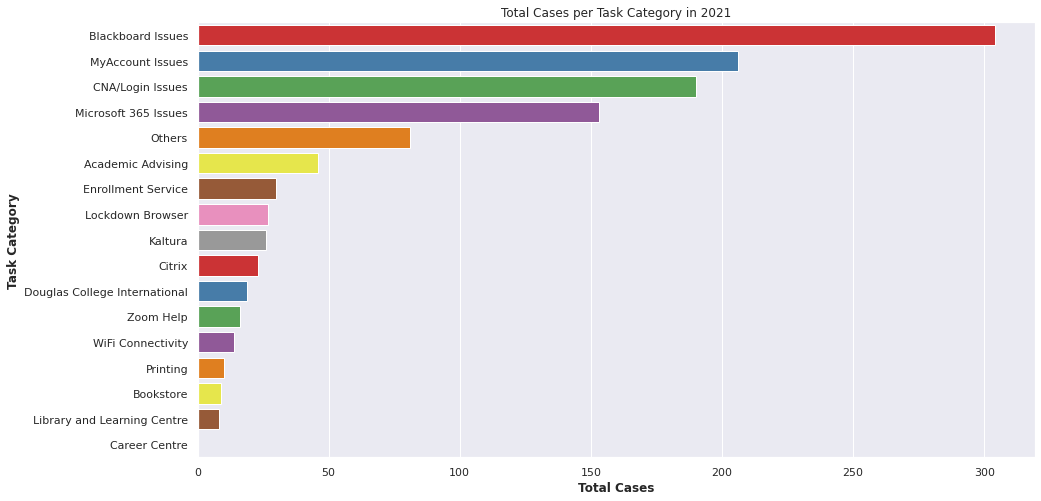

In [6]:
df_taskCategory = pd.read_excel(taskCategoryDataPath, sheet_name="Task Category");

# Reference: https://stackoverflow.com/questions/54017422/plot-horizontal-bar-plot-with-seaborn

def getBarChart_TaskCategory(dataframe_taskCategory, xColumn):
    dfPivot = getPivot(dataframe_taskCategory, xColumn);
    with sns.axes_style("darkgrid"):
        sns.set(rc = {'figure.figsize':(15,8)});
        chart = sns.barplot(data=dfPivot, x="Total Cases", y=dfPivot.index, 
                            orient="h", palette="Set1");
        plt.xlabel("Total Cases", fontweight="bold");
        plt.ylabel(xColumn, fontweight="bold");
        plt.title(f"Total Cases per {xColumn} in 2021");
    return chart;
  
getBarChart_TaskCategory(df_taskCategory, "Task Category")

Semester

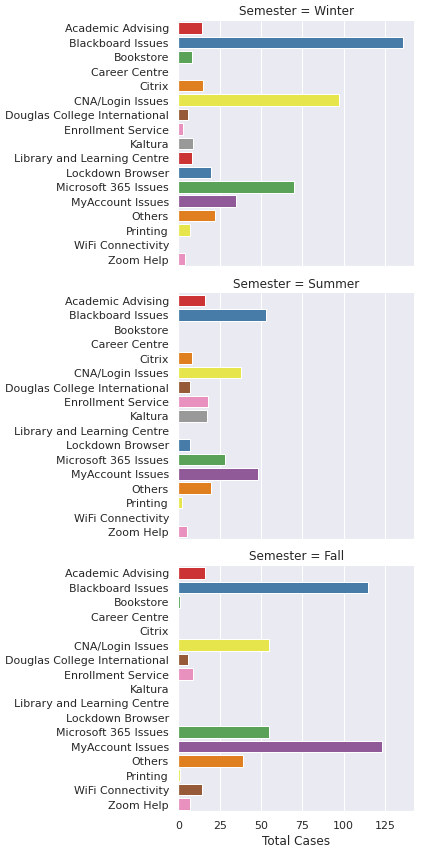

In [7]:
df_semester = pd.read_excel(taskCategoryDataPath, sheet_name="Semester");

# Reference: 
# - https://stackoverflow.com/questions/40362362/changing-the-colors-of-each-hist-facet-on-facetgrid
# - https://datavizpyr.com/sort-bars-in-barplot-using-seaborn-in-python/

def getFacetGrid_Semester(dataframe_semester, hueColumn, xColumn):
  dataframeTransposed_semester = getTransposedDataframe(dataframe_semester, 
                                                        hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_semester, col=hueColumn, 
                          hue=hueColumn, col_wrap=1, height=4, aspect=1.5);
    # yColumn = "Total Cases";
    chartCollection = chart.map_dataframe(sns.barplot, x="Total Cases", 
                                          y=xColumn,
                                          palette="Set1", orient="h");
  return chartCollection;

getFacetGrid_Semester(df_semester, "Semester", "Task Category")

Month

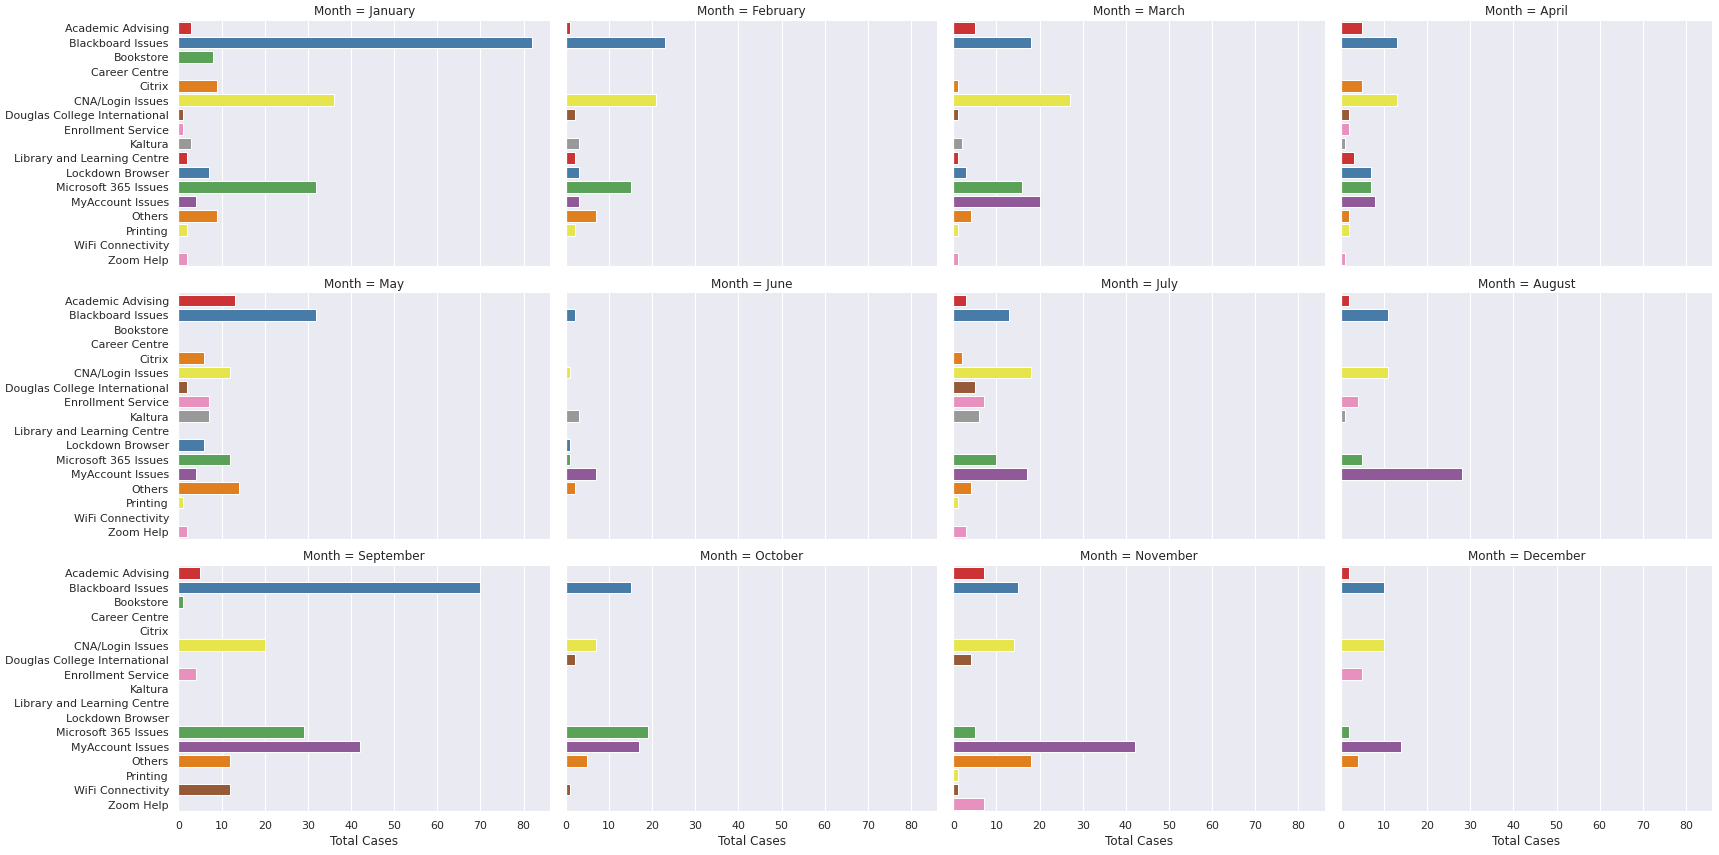

In [8]:
df_month = pd.read_excel(taskCategoryDataPath, sheet_name="Month");

def getFacetGrid_Month(dataframe_month, hueColumn, xColumn):
  dataframeTransposed_month = getTransposedDataframe(dataframe_month, 
                                                        hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_month, col=hueColumn, 
                          hue=hueColumn, col_wrap=4, height=4, aspect=1.5);
    chartCollection = chart.map_dataframe(sns.barplot, x="Total Cases", 
                                          y=xColumn,
                                          palette="Set1", orient="h");
  return chartCollection;

getFacetGrid_Month(df_month, "Month", "Task Category")

Weekday

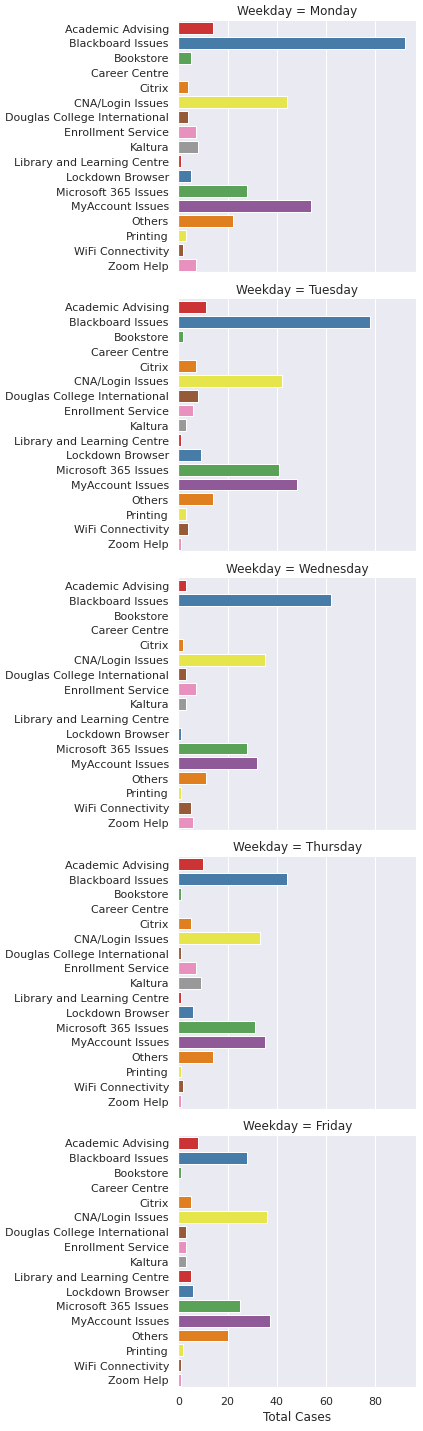

In [9]:
df_weekday = pd.read_excel(taskCategoryDataPath, sheet_name="Weekday");

def getFacetGrid_Weekday(dataframe_weekday, hueColumn, xColumn):
  dataframeTransposed_weekday = getTransposedDataframe(dataframe_weekday, 
                                                        hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_weekday, col=hueColumn, 
                          hue=hueColumn, col_wrap=1, height=4, aspect=1.5);
    chartCollection = chart.map_dataframe(sns.barplot, x="Total Cases", 
                                          y=xColumn,
                                          palette="Set1", orient="h");
  return chartCollection;

getFacetGrid_Weekday(df_weekday, "Weekday", "Task Category")

Weekday - Semester

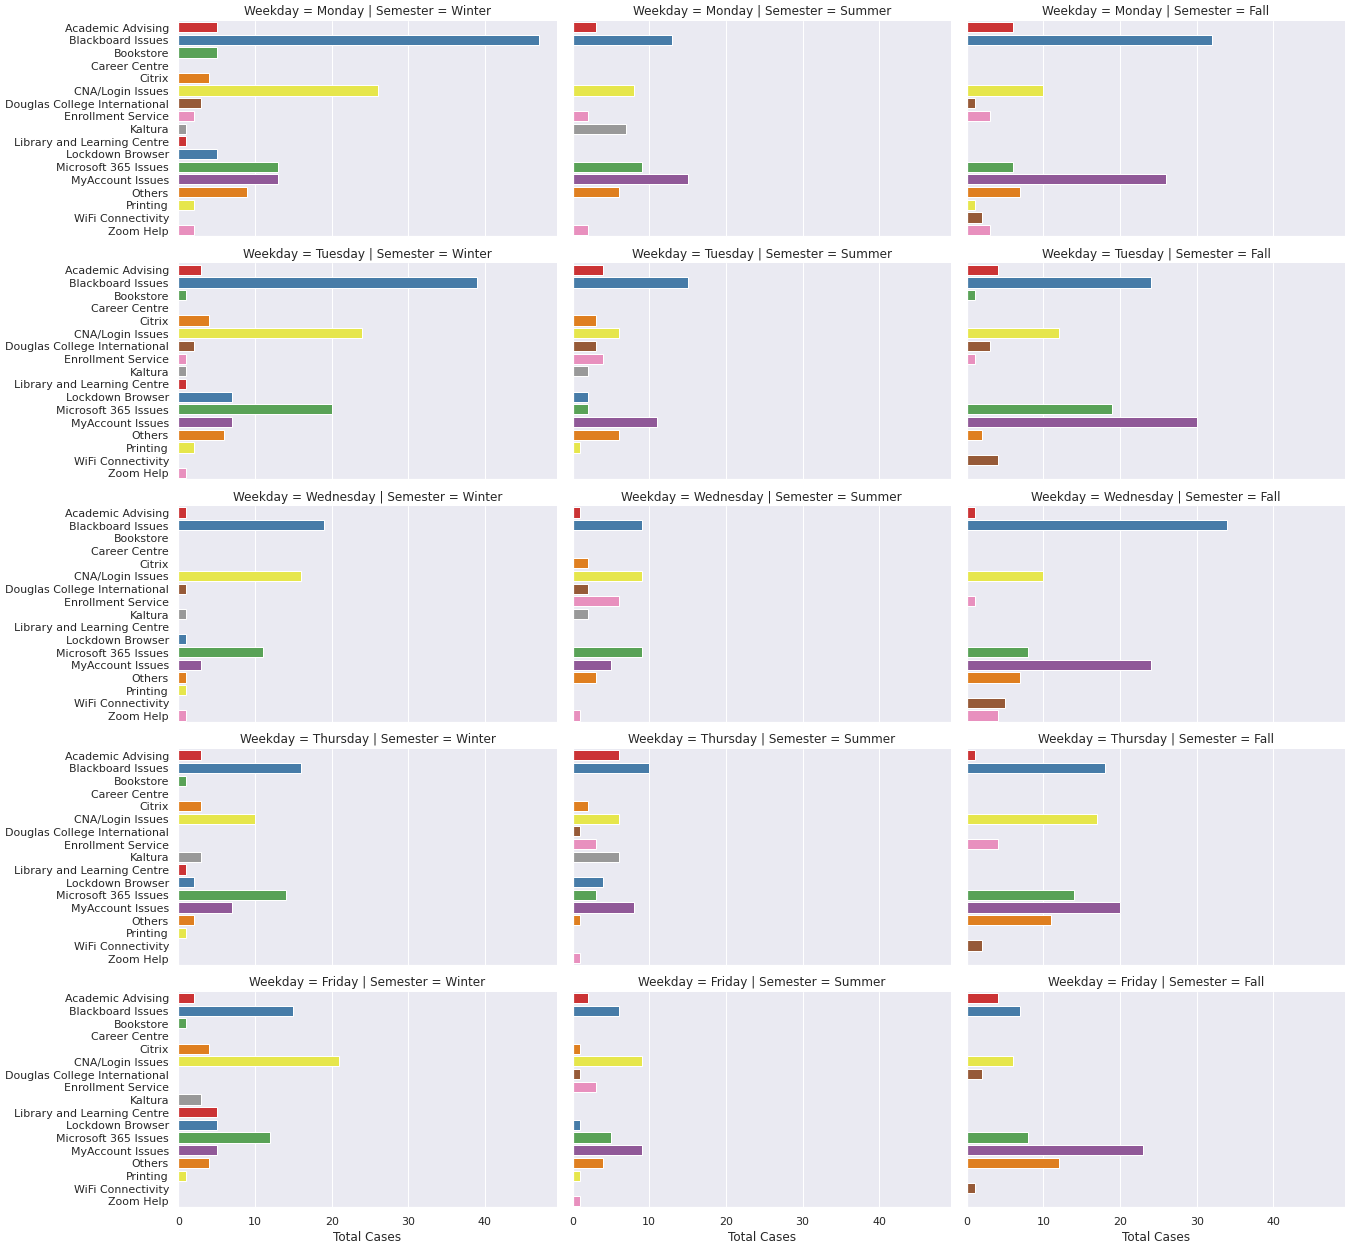

In [10]:
df_weekdayWinter = pd.read_excel(taskCategoryDataPath, sheet_name="Weekday - Winter");
df_weekdaySummer = pd.read_excel(taskCategoryDataPath, sheet_name="Weekday - Summer");
df_weekdayFall = pd.read_excel(taskCategoryDataPath, sheet_name="Weekday - Fall");

def getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, 
                                      dataframeFall, hueColumn, xColumn, 
                                      hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, hueColumn, xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, hueColumn, xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, hueColumn, xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

# getTotalCasesPerWeekdayInSemester(df_weekdayWinter, df_weekdaySummer, 
#                                   df_weekdayFall, "Weekday", "Time Range", 
#                                   "Semester")

def getFacetGrid_Weekday_Semester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_weekday_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_weekday_semester, row=hueColumn, col=hueFacet, height=3.5, aspect=1.8, hue=hueColumn);
    chartCollection = chart.map_dataframe(sns.barplot, x="Total Cases", 
                                          y=xColumn,
                                          palette="Set1", orient="h");
  return chart;

getFacetGrid_Weekday_Semester(df_weekdayWinter, df_weekdaySummer, df_weekdayFall, "Weekday", "Task Category", "Semester")

Week

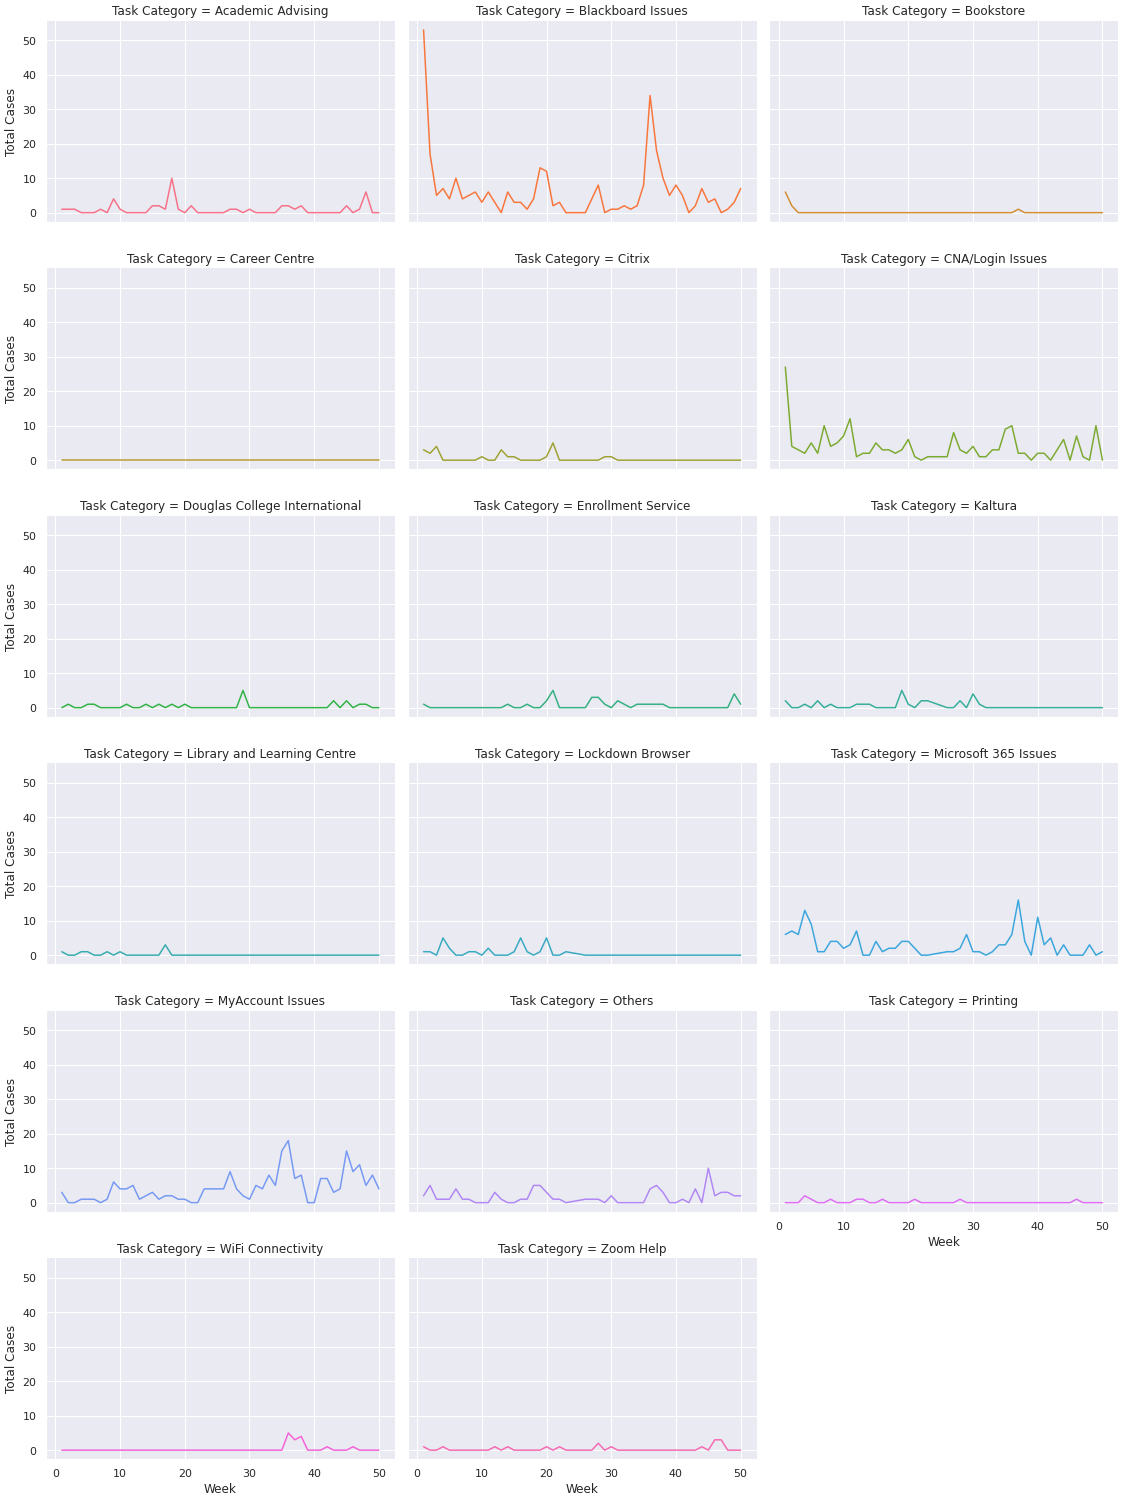

In [11]:
df_week = pd.read_excel(taskCategoryDataPath, sheet_name="Week");

def getFacetGrid_Week(dataframe_week, hueColumn, xColumn):
  dataframeTransposed_week = getTransposedDataframe(dataframe_week, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_week, hue=xColumn, col=xColumn, height=3.5, aspect=1.5, col_wrap=3);
    chartCollection = chart.map_dataframe(sns.lineplot, x=hueColumn, y="Total Cases");
  return chartCollection;

getFacetGrid_Week(df_week, "Week", "Task Category")

Time Range

<AxesSubplot:title={'center':'Total Cases per Time Range by Task Category in 2021'}, xlabel='Time Range', ylabel='Task Category'>

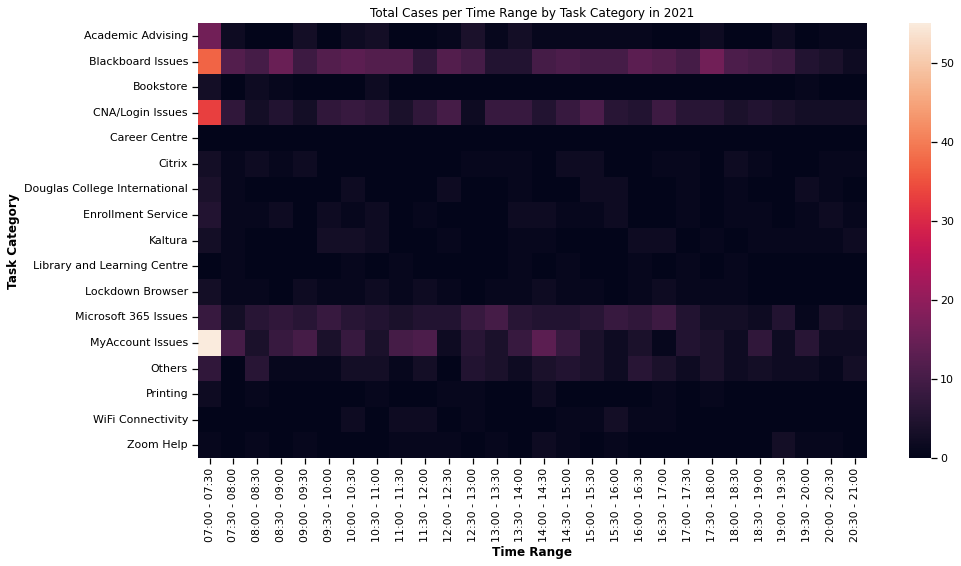

In [12]:
df_timeRange = pd.read_excel(taskCategoryDataPath, sheet_name="Time Range");

def getHeatMapChart_TimeRange(dataframe_timeRange, hueColumn, xColumn):
  dataframeTransposed_timeRange = getTransposedDataframe(dataframe_timeRange, hueColumn, xColumn);
  dataframeTransposed_week_Pivot = dataframeTransposed_timeRange.pivot(hueColumn, xColumn, "Total Cases");
  chart = sns.heatmap(dataframeTransposed_week_Pivot);
  plt.ylabel(hueColumn, fontweight="bold");
  plt.xlabel(xColumn, fontweight="bold");
  plt.title(f"Total Cases per {xColumn} by {hueColumn} in 2021");
  plt.xticks(rotation=90);
  return chart;

getHeatMapChart_TimeRange(df_timeRange, "Task Category", "Time Range")

Time of Day

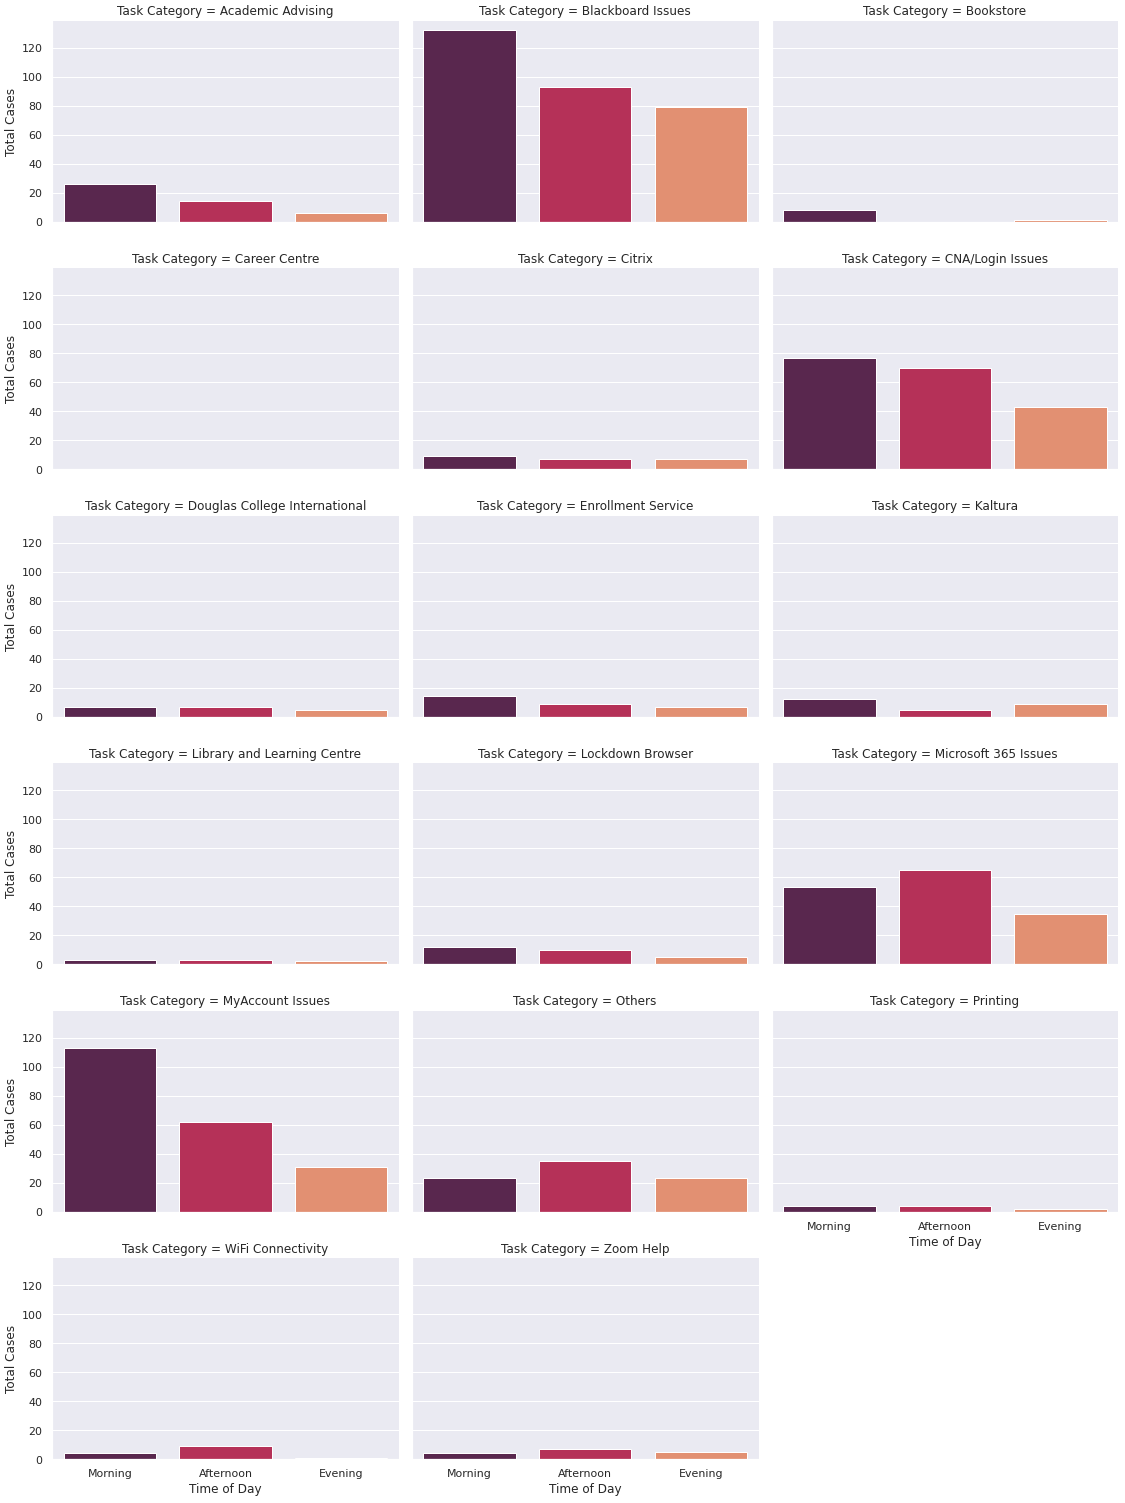

In [13]:
df_timeOfDay = pd.read_excel(taskCategoryDataPath, sheet_name="Time of Day");

def getFacetGrid_TimeOfDay(dataframe_timeOfDay, hueColumn, xColumn):
  dataframeTransposed_timeOfDay = getTransposedDataframe(dataframe_timeOfDay, hueColumn, xColumn);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeOfDay, col=hueColumn, col_wrap=3, height=3.5, aspect=1.5);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", palette="rocket");
  return chartCollection;

getFacetGrid_TimeOfDay(df_timeOfDay, "Task Category", "Time of Day")

Time Range in Semester

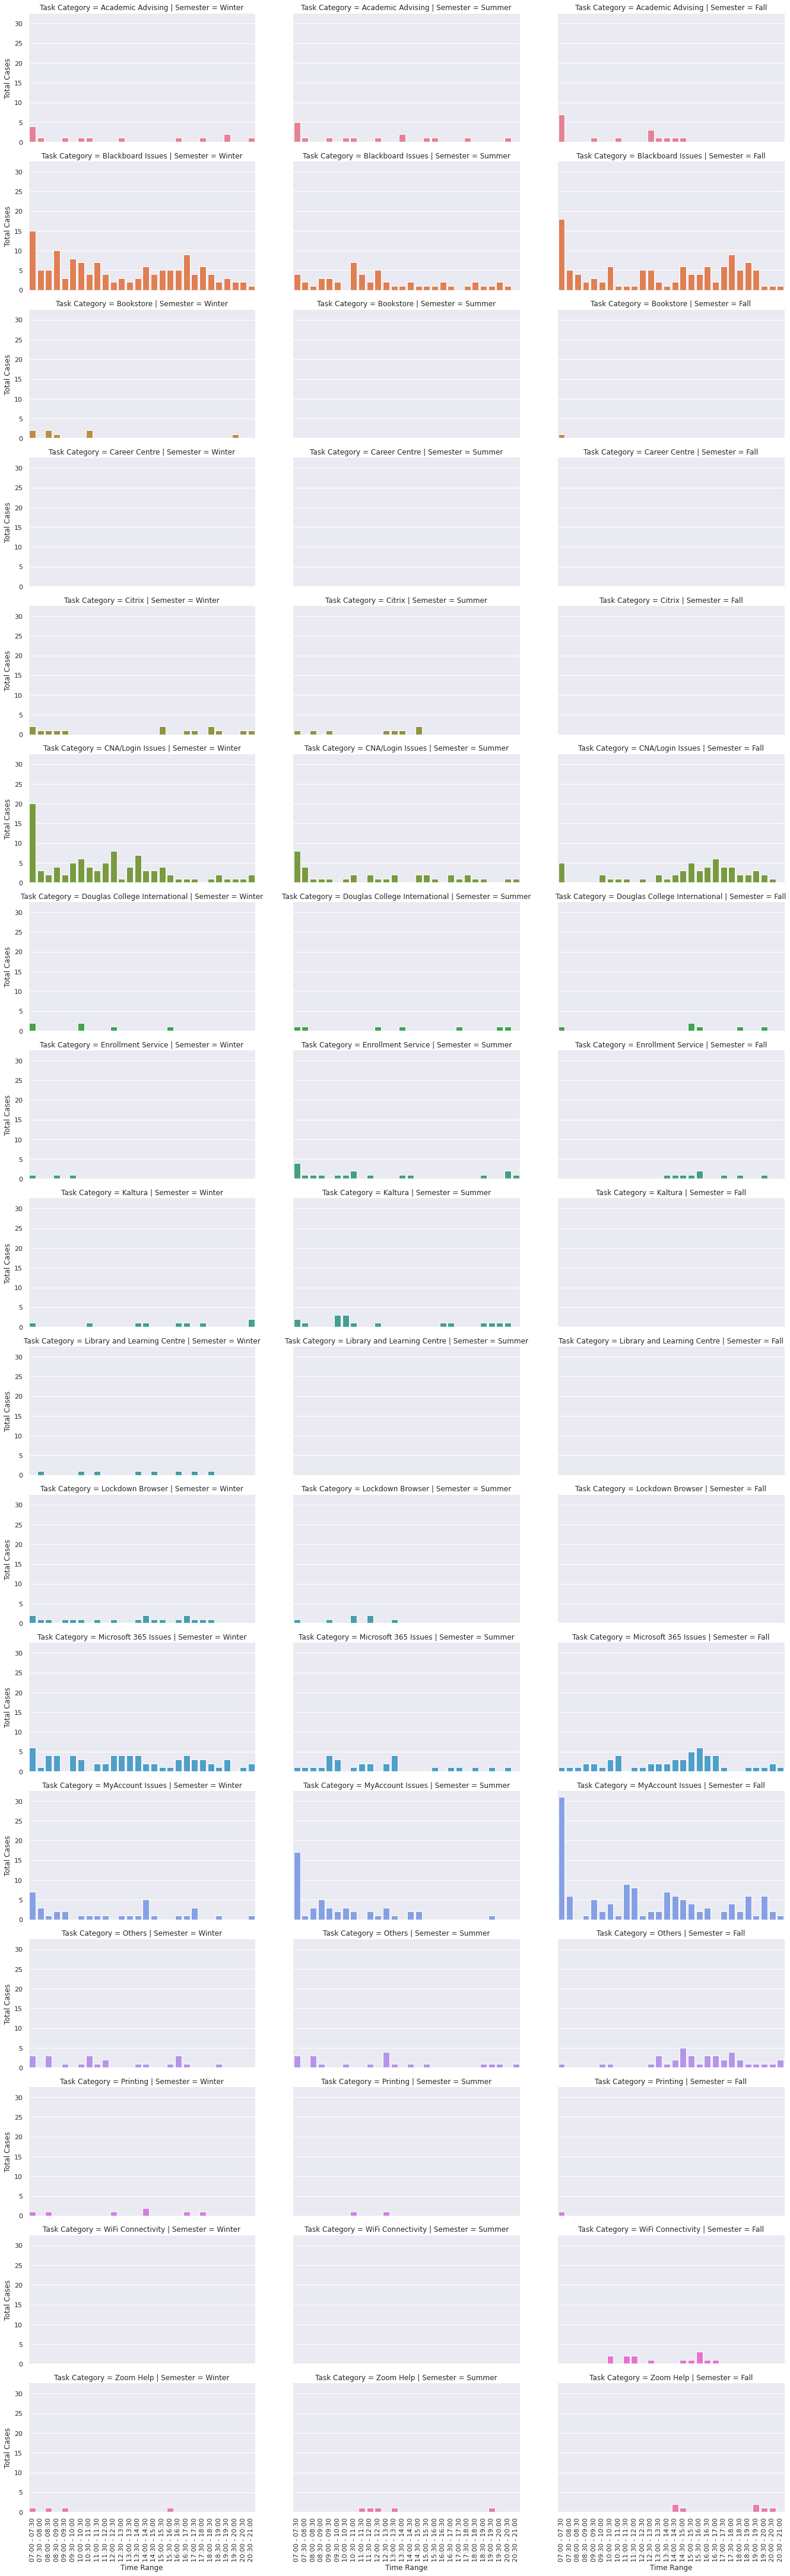

In [14]:
df_weekdayWinter = pd.read_excel(taskCategoryDataPath, sheet_name="Time Range - Winter");
df_weekdaySummer = pd.read_excel(taskCategoryDataPath, sheet_name="Time Range - Summer");
df_weekdayFall = pd.read_excel(taskCategoryDataPath, sheet_name="Time Range - Fall");

def getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_winter = getTransposedDataframe(dataframeWinter, hueColumn, xColumn);
  dataframeTransposed_summer = getTransposedDataframe(dataframeSummer, hueColumn, xColumn);
  dataframeTransposed_fall = getTransposedDataframe(dataframeFall, hueColumn, xColumn);

  dataframeTransposed_winter[hueFacet] = "Winter";
  dataframeTransposed_summer[hueFacet] = "Summer";
  dataframeTransposed_fall[hueFacet] = "Fall";

  dataframeTransposedCombined = pd.concat([dataframeTransposed_winter,dataframeTransposed_summer,dataframeTransposed_fall]);
  cols = list(dataframeTransposedCombined.columns);
  cols = [cols[-1]] + cols[:-1];
  dataframeTransposedCombined = dataframeTransposedCombined[cols];

  return dataframeTransposedCombined;

def getFacetGrid_TimeRange_Semester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_timeRange_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeRange_semester, row=hueColumn, col=hueFacet, height=3.5, aspect=1.8, hue=hueColumn);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases");
    for axes in chart.axes.flat:
      _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90);
  return chart;

getFacetGrid_TimeRange_Semester(df_weekdayWinter, df_weekdaySummer, df_weekdayFall, "Task Category", "Time Range", "Semester")

Time of Day in Semester

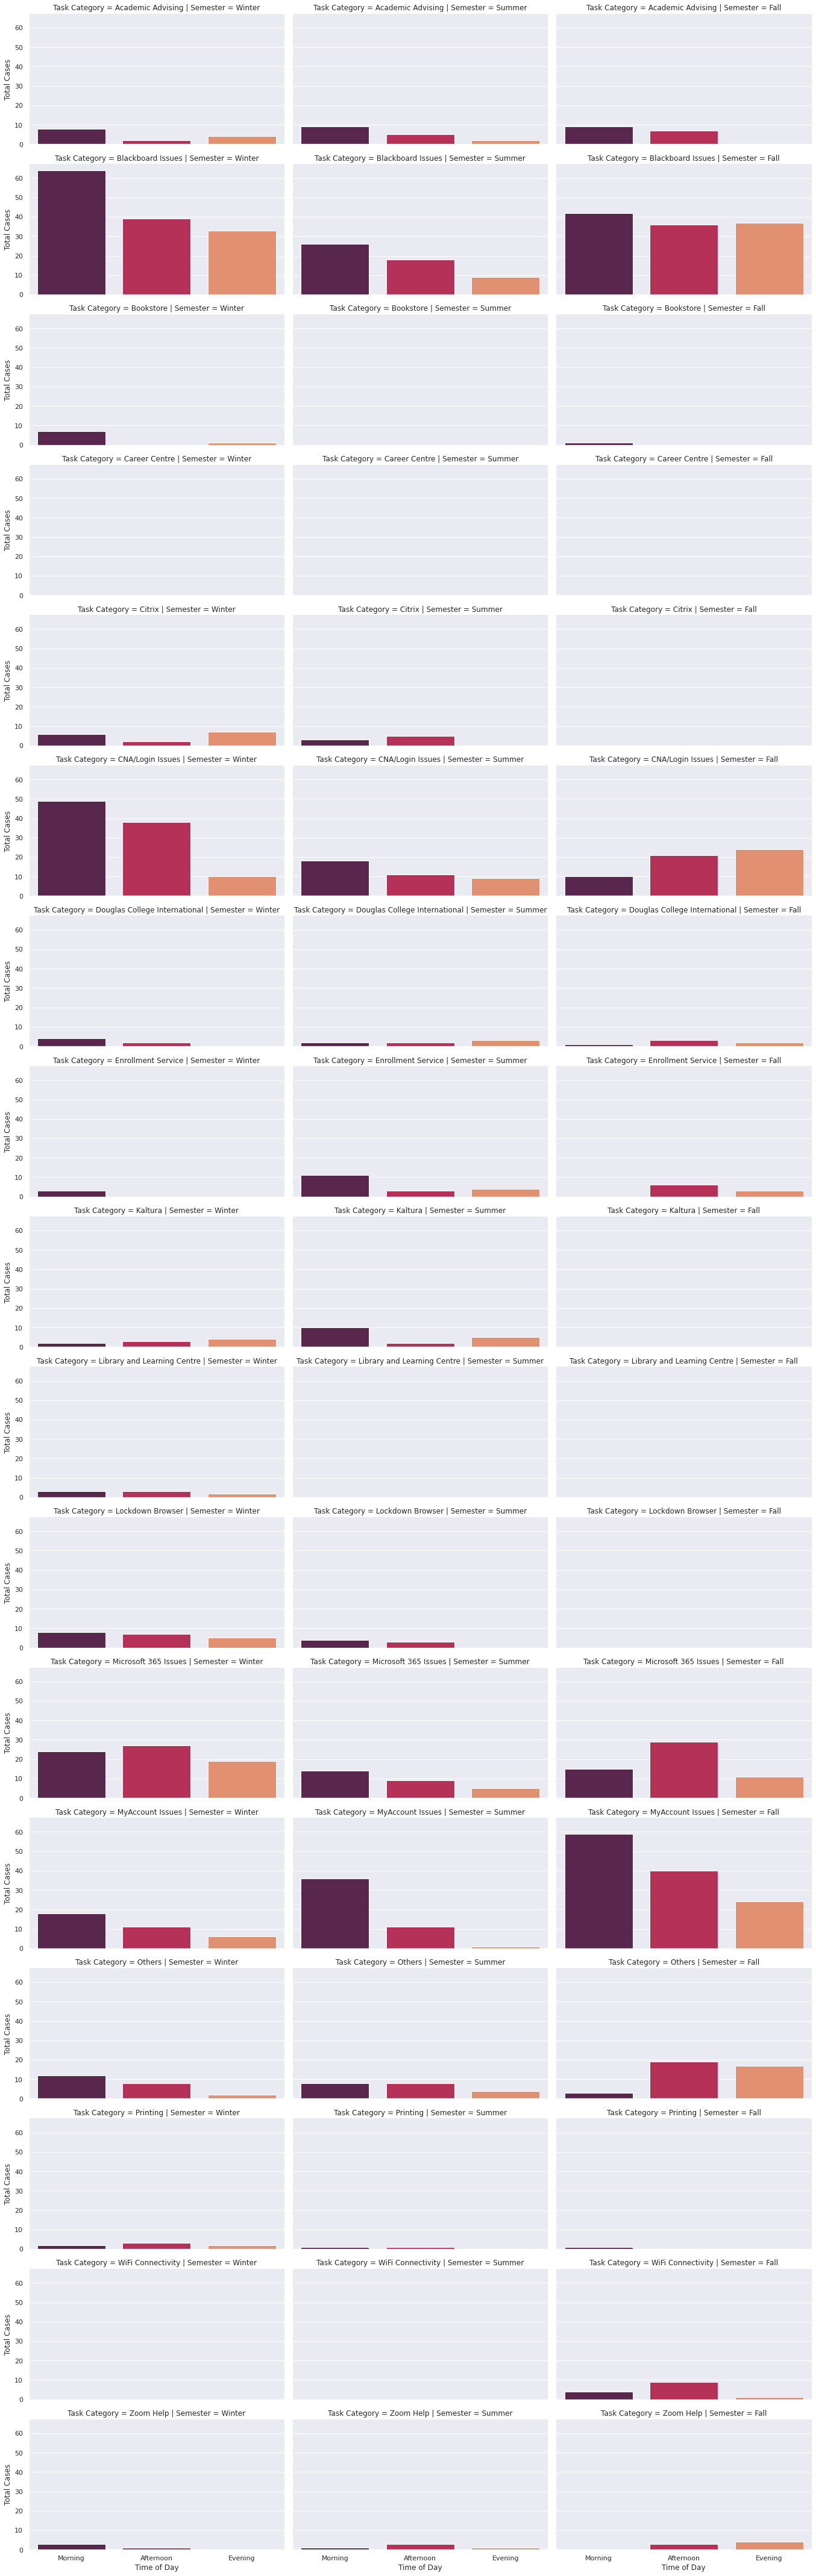

In [15]:
df_weekdayWinter_timeOfDay = pd.read_excel(taskCategoryDataPath, sheet_name="Time of Day - Winter");
df_weekdaySummer_timeOfDay = pd.read_excel(taskCategoryDataPath, sheet_name="Time of Day - Summer");
df_weekdayFall_timeOfDay = pd.read_excel(taskCategoryDataPath, sheet_name="Time of Day - Fall");

def getFacetGrid_TimeOfDay_Semester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet):
  dataframeTransposed_timeOfDay_semester = getTotalCasesPerWeekdayInSemester(dataframeWinter, dataframeSummer, dataframeFall, hueColumn, xColumn, hueFacet);
  with sns.axes_style("darkgrid"):
    sns.set(rc = {'figure.figsize':(15,8)});
    chart = sns.FacetGrid(data=dataframeTransposed_timeOfDay_semester, row=hueColumn, col=hueFacet, height=3.5, aspect=1.8, hue=hueColumn);
    chartCollection = chart.map_dataframe(sns.barplot, x=xColumn, y="Total Cases", palette="rocket");
  return chart;

getFacetGrid_TimeOfDay_Semester(df_weekdayWinter_timeOfDay, df_weekdaySummer_timeOfDay, df_weekdayFall_timeOfDay, "Task Category", "Time of Day", "Semester")